In [37]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
from matplotlib.animation import FuncAnimation

In [10]:
imgs_path = 'dataset/images'
img_id = os.listdir(imgs_path)[1]
img_path = os.path.join(imgs_path, img_id)
img = nib.load(img_path)

In [30]:
len(os.listdir(imgs_path))

171

In [12]:
type(img)

nibabel.nifti1.Nifti1Image

In [16]:
np_arry = img.get_fdata()

In [18]:
type(np_arry)

numpy.memmap

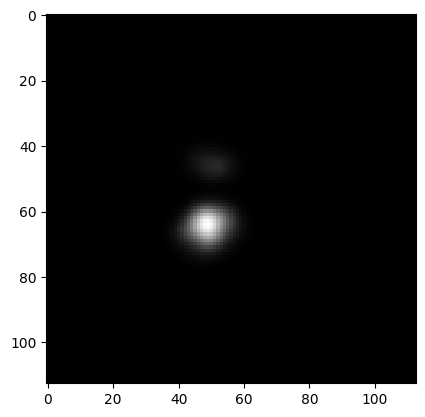

In [28]:
#write dataloader
plt.imshow(np_arry[:,0,:], cmap='gray')

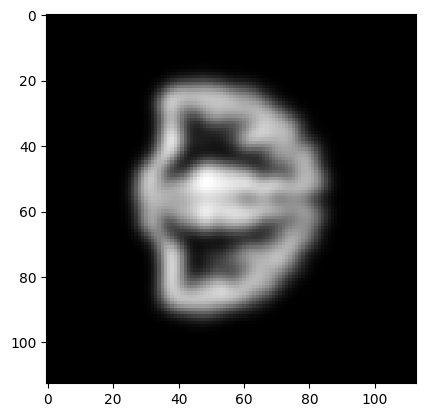

In [32]:
plt.imshow(np_arry[:,111,:], cmap='gray')

In [36]:
height, frames, width = np_arry.shape
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))
[out.write(np_arry[i]) for i in range(frames)]
out.release()

error: OpenCV(4.9.0) /io/opencv/modules/videoio/src/cap_ffmpeg.cpp:169: error: (-215:Assertion failed) image.depth() == CV_8U || image.depth() == CV_16U in function 'write'


RuntimeError: The animation function must return a sequence of Artist objects.

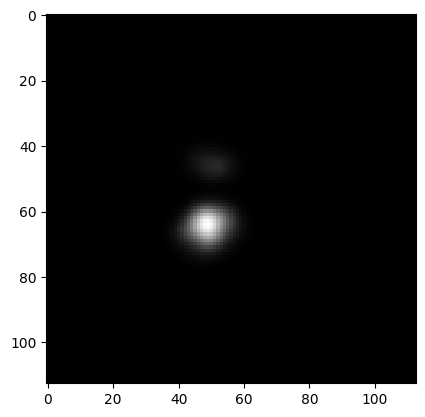

In [40]:
def update(frame):
    ax.imshow(np_arry[:, frame, :], cmap='gray')
    return ax

fig, ax = plt.subplots()

# Create the animation
ani = FuncAnimation(fig, update, frames=range(np_arry.shape[2]), blit=True)

# Save the animation as a movie file
ani.save('binary_movie.mp4', fps=10)  # Adjust fps as needed